### IMPORTATIONS

In [15]:
from time import time

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from kmerlib.running_window import *
from kmerlib.spectrum import *
from kmerlib.tools import *
from utils.term_colors import *

import json

# Plot config
sns.set()
%matplotlib notebook

### LOAD DATA

In [2]:
with open('./data/running_window_fulldataset.json', 'r') as f:
    data = json.load(f)

## K-mer study

### Settings

> Aeropyrum_pernix archaea


<IPython.core.display.Javascript object>


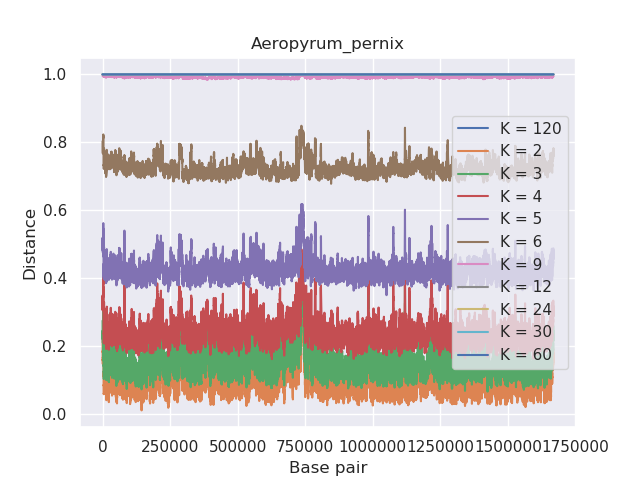

> Aquifex_aeolicus bacteria


<IPython.core.display.Javascript object>


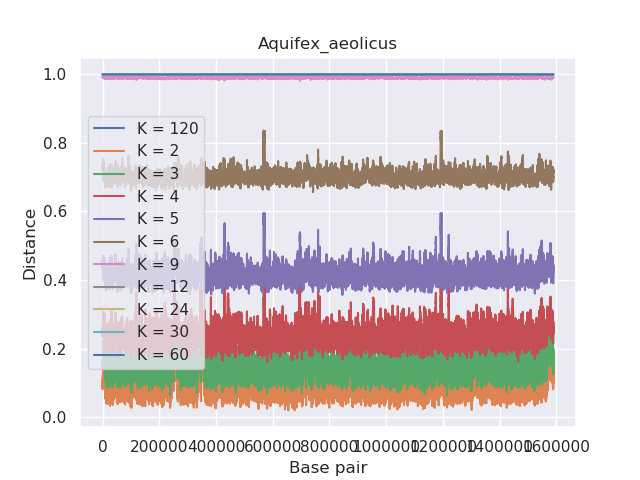

> Methanocaldococcus_fervens archaea


<IPython.core.display.Javascript object>


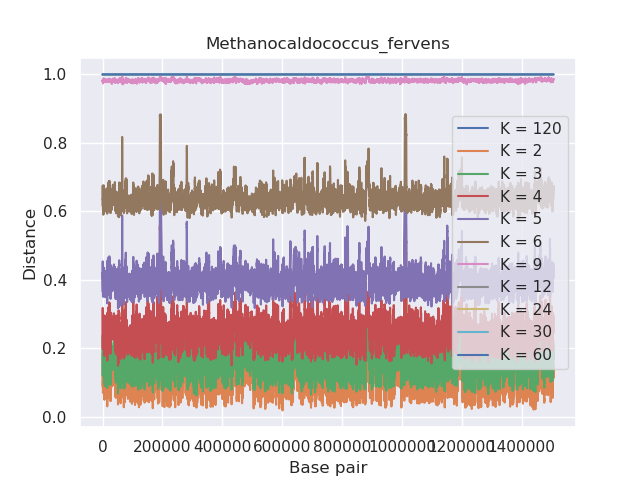

In [16]:
win_len = '1000'
step = int(win_len) // 100
for s in data:
    # Initialization
    name = s["name"]
    type_ = s["type"]
    seq = s["seq"]
    print("> " +FG_RED+ name +" "+FG_BLUE+ type_ +END_COLOR)
    plt.figure()
    
    for k in s["distances"]:
        distances = s["distances"][k][win_len]
        bp = list(range(0, len(distances)*step, step))
        plt.plot(bp, distances, label="K = {}".format(k))
    # Configure plot
    plt.xlabel('Base pair')
    plt.ylabel('Distance')
    plt.title(name)
    plt.legend()
plt.show()

> Aeropyrum_pernix archaea


<IPython.core.display.Javascript object>


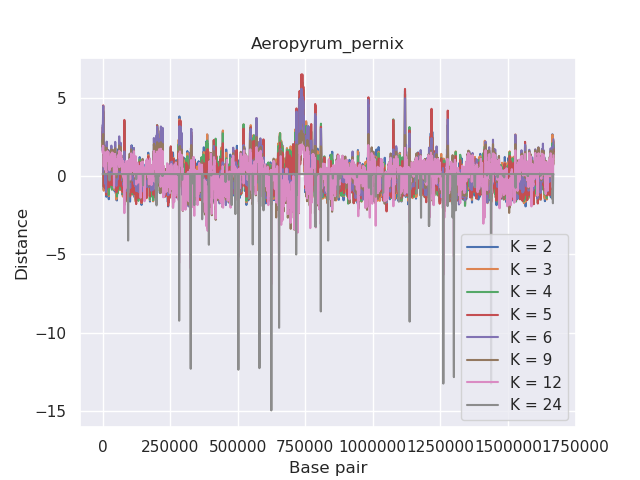

> Aquifex_aeolicus bacteria


<IPython.core.display.Javascript object>


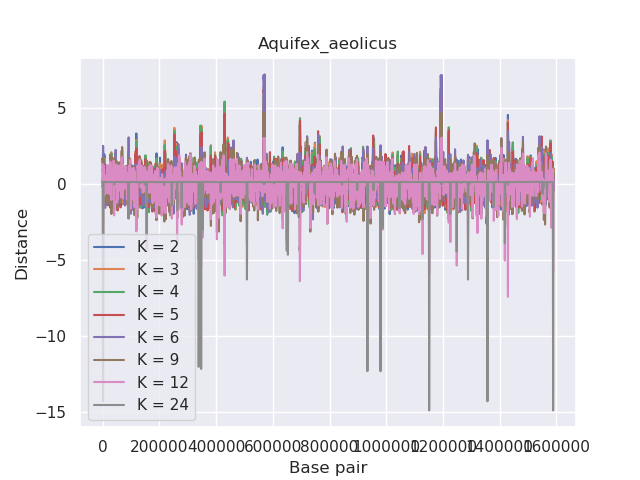

> Methanocaldococcus_fervens archaea


<IPython.core.display.Javascript object>


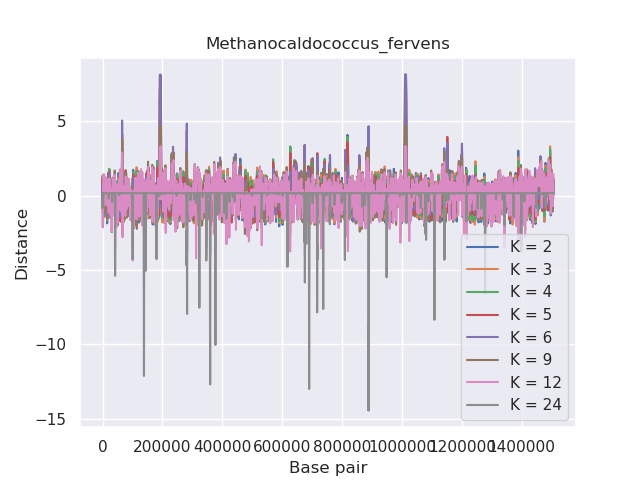

In [20]:
win_len = '1000'
step = int(win_len) // 100
for s in data:
    # Initialization
    name = s["name"]
    type_ = s["type"]
    seq = s["seq"]
    print("> " +FG_RED+ name +" "+FG_BLUE+ type_ +END_COLOR)
    plt.figure()
    
    for k in s["distances"]:
        if int(k) > 24:
            continue
        distances = s["distances"][k][win_len]
        distances = (np.array(distances) - np.mean(distances)) / np.std(distances)
        distances = running_average(distances, 50)
        bp = list(range(0, len(distances)*step, step))
        plt.plot(bp, distances, label="K = {}".format(k))
    # Configure plot
    plt.xlabel('Base pair')
    plt.ylabel('Distance')
    plt.title(name)
    plt.legend()
plt.show()